# Dataset

The NBA Draft Combine dataset provides a comprehensive collection of player performance metrics and physical measurements recorded during the annual pre-draft evaluation process.  

This dataset contains records of NBA Draft Combine participants, including key metrics such as height, weight, wingspan, vertical leap, lane agility time, and various shooting drill performances. These measurements and test results are crucial for NBA teams in assessing player potential and athleticism before making draft selections. Some records may have incomplete or missing data due to variations in player participation and testing availability.  

This dataset can be used for analyzing player trends, comparing draft classes, and evaluating the relationship between combine performance and NBA success.


In [ ]:
#import pandas
import pandas as pd

In [ ]:
# Import the NBA Draft Combine dataset (CSV file
# The file location
df = pd.read_csv('https://raw.githubusercontent.com/RyanHinshaw/csc442_group_project/refs/heads/main/draft_combine.csv')


# # Read in the file and print out the DataFrame
# df = pd.read_csv(file_path)
print(df.head())

   YEAR           PLAYER POS   HGT    WGT    BMI  BF  WNGSPN  STNDRCH  HANDL  \
0  2024   Ajayi, Michael  SF  77.8  227.8  26.49 NaN    84.8    106.5    9.5   
1  2024   Ajinca, Melvin  SF  79.3  213.8  23.93 NaN    79.5    106.5    8.5   
2  2024  Alexander, Trey  SG  75.3    187  23.22 NaN    82.5    101.5    9.0   
3  2024    Almansa, Izan   C  81.3  219.6  23.39 NaN    85.0    110.0    9.0   
4  2024   Beekman, Reece  PG  73.3  196.4  25.73 NaN    78.5    100.0    9.0   

   ...  STNDVERT  LPVERT  LANE  SHUTTLE  SPRINT  BENCH    BAR   PAN  PBHGT  \
0  ...      27.0    34.5  12.0     3.17    3.21    NaN  1.090  92.6  133.5   
1  ...      26.5    31.0  12.0     3.00    3.38    NaN  1.003  82.9  133.0   
2  ...      27.0    32.0  11.0     3.00    3.00    NaN  1.096  87.5  128.5   
3  ...      28.0    35.0  11.0     3.00    3.00    NaN  1.046  85.6  138.0   
4  ...      30.0    37.0  11.0     3.00    3.00    NaN  1.072  76.5  130.0   

   PDHGT  
0  141.0  
1  137.5  
2  133.5  
3  145

# 1.Data Cleaning

## 1.1 Get to know data

> #### Data description:
Include the details of your features in the dataset here.

The data dictionary:

- 'Index': value given as the artwork was catelogued, unique for every piece
- 'Title': Title for the artwork, can overlap with other paintings
- 'Artist': The name of the artist
- 'ConstituentID': unique artist ID
- 'Date': Date the artwork is known to be painted
- 'Medium': Details about the medium used to paint the artwork
- 'Dimensions': Dimensions of the artwork
- 'CreditLine': How was this artwork acquired  
- 'AccessionNumber': ID unique for each piece in MoMA
- 'Classification': Denotes the type of artwork
- 'Department': Department name
- 'DateAcquired': Date the painting was acquired by MoMA
- 'Cataloged': If the painting has been catelogued
- 'ObjectID': ID for the peice
- 'URL': URL for image
- 'ThumbnailURL': URL for the thumbnail
- 'Circumference (cm)': Circumference of the artwork
- 'Depth (cm)': Depth of the artwork
- 'Diameter (cm)': Diameter of the artwork
- 'Height (cm)': Height of the artwork
- 'Length (cm)': Length of the artwork
- 'Weight (kg)': Weight of the artwork
- 'Width (cm)': Width of the artwork
- 'Seat Height (cm)': Height of the seat near the artwork
- 'Duration (sec.)': Duration permissable for viewing in seconds

In [ ]:
# find shape of the data
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1610, 21)


In [ ]:
# print columns labels
print("Column labels:", df.columns.tolist())

Column labels: ['YEAR', 'PLAYER', 'POS', 'HGT', 'WGT', 'BMI', 'BF', 'WNGSPN', 'STNDRCH', 'HANDL', 'HANDW', 'STNDVERT', 'LPVERT', 'LANE', 'SHUTTLE', 'SPRINT', 'BENCH', 'BAR', 'PAN', 'PBHGT', 'PDHGT']


In [ ]:
# check row labels
print("Row labels:", df.index)

Row labels: RangeIndex(start=0, stop=1610, step=1)


In [ ]:
# find the column that is unique to each row (unit of observation)
# HINT: these will have number of unique values equal to the  number of rows in the dataframe
# could be names or IDs
unique_counts = df.nunique()
unique_columns = unique_counts[unique_counts == df.shape[0]].index.tolist()

print("Columns unique to each row:", unique_columns)

Columns unique to each row: ['PLAYER']


In [ ]:
# check type of varaibles
print(df.dtypes)

YEAR          int64
PLAYER       object
POS          object
HGT         float64
WGT          object
BMI         float64
BF          float64
WNGSPN      float64
STNDRCH     float64
HANDL       float64
HANDW       float64
STNDVERT    float64
LPVERT      float64
LANE        float64
SHUTTLE     float64
SPRINT      float64
BENCH       float64
BAR         float64
PAN         float64
PBHGT       float64
PDHGT       float64
dtype: object


Strings are usually represented as objects, check few rows to learn more about objects. They could also be compound data types like lists and dictionaries within a column - that may need more cleaning.

You can find the datatype of a column through `dtype`







 attribute

In [ ]:
# similarly to know the datatype of a single column in the dataframe
# HINT: use dtype
#paintings["Width (cm)"].dtype
#print(df.columns.tolist())
print(df["PLAYER"].dtype)

object


In [ ]:
# display the head
print(df.head())

   YEAR           PLAYER POS   HGT    WGT    BMI  BF  WNGSPN  STNDRCH  HANDL  \
0  2024   Ajayi, Michael  SF  77.8  227.8  26.49 NaN    84.8    106.5    9.5   
1  2024   Ajinca, Melvin  SF  79.3  213.8  23.93 NaN    79.5    106.5    8.5   
2  2024  Alexander, Trey  SG  75.3    187  23.22 NaN    82.5    101.5    9.0   
3  2024    Almansa, Izan   C  81.3  219.6  23.39 NaN    85.0    110.0    9.0   
4  2024   Beekman, Reece  PG  73.3  196.4  25.73 NaN    78.5    100.0    9.0   

   ...  STNDVERT  LPVERT  LANE  SHUTTLE  SPRINT  BENCH    BAR   PAN  PBHGT  \
0  ...      27.0    34.5  12.0     3.17    3.21    NaN  1.090  92.6  133.5   
1  ...      26.5    31.0  12.0     3.00    3.38    NaN  1.003  82.9  133.0   
2  ...      27.0    32.0  11.0     3.00    3.00    NaN  1.096  87.5  128.5   
3  ...      28.0    35.0  11.0     3.00    3.00    NaN  1.046  85.6  138.0   
4  ...      30.0    37.0  11.0     3.00    3.00    NaN  1.072  76.5  130.0   

   PDHGT  
0  141.0  
1  137.5  
2  133.5  
3  145

## 1.2 Identify which numerical columns and categorical columns

In [ ]:
# create a list of the columns that are categorical and those that are integer and those that have string values
import numpy as np
numerical = []
categorical = []
string = []

for column in df.columns:
    # Check if the column is of string type (this could be 'object' or 'category')
    if df[column].dtype == 'object' or pd.api.types.is_string_dtype(df[column]):
        if df[column].nunique() <= 10:
            categorical.append(column)  # Categorical columns (fewer unique values)
        else:
            string.append(column)  # String columns (many unique values)
    # Check if the column contains numerical values (integer or float)
    elif np.issubdtype(df[column].dtype, np.number):
        numerical.append(column)  # Numerical columns

# Print the classified columns
print("Numerical columns: ", numerical)
print("Categorical columns: ", categorical)
print("String columns: ", string)

Numerical columns:  ['YEAR', 'HGT', 'BMI', 'BF', 'WNGSPN', 'STNDRCH', 'HANDL', 'HANDW', 'STNDVERT', 'LPVERT', 'LANE', 'SHUTTLE', 'SPRINT', 'BENCH', 'BAR', 'PAN', 'PBHGT', 'PDHGT']
Categorical columns:  []
String columns:  ['PLAYER', 'POS', 'WGT']


Why were numerical columns put into categorical bin?

But categorical columns are not coded as cetagorical - let's fix that.

### 1.2.1 Categorical columns coding

Sometimes you need some categorical columns to be numbers, or encoded as numbers.

In [ ]:
# convert all the columns in the categorical list to be of the type category
for column in categorical:
    df[column] = df[column].astype('category')

# Check the updated data types
print(df.dtypes)

YEAR          int64
PLAYER       object
POS          object
HGT         float64
WGT          object
BMI         float64
BF          float64
WNGSPN      float64
STNDRCH     float64
HANDL       float64
HANDW       float64
STNDVERT    float64
LPVERT      float64
LANE        float64
SHUTTLE     float64
SPRINT      float64
BENCH       float64
BAR         float64
PAN         float64
PBHGT       float64
PDHGT       float64
dtype: object


Most of the commands shown until this point, you would have used in your homework assignment 4.

### 1.2.2. Numerical column consistency



In [ ]:
# We have multiple ID columns, check formats
# ConstitutentID should be an Integer but is currently represented as a Float with .0
#paintings['ConstituentID'] = paintings['ConstituentID'].astype(int)
#df['PLAYER'] = pd.to_numeric(df['PLAYER'], errors='coerce')  # Convert numeric, set others to NaN

# Now convert to 'Int64' to handle NaNs, if any
#df['PLAYER'] = df['PLAYER'].astype('Int64')

# Check the updated data types
print(df.dtypes)

YEAR          int64
PLAYER       object
POS          object
HGT         float64
WGT          object
BMI         float64
BF          float64
WNGSPN      float64
STNDRCH     float64
HANDL       float64
HANDW       float64
STNDVERT    float64
LPVERT      float64
LANE        float64
SHUTTLE     float64
SPRINT      float64
BENCH       float64
BAR         float64
PAN         float64
PBHGT       float64
PDHGT       float64
dtype: object


What is the difference between int and Int?

### 1.2.3 Working with date and time columns

In [ ]:
df['YEAR'].head(20)

,YEAR
0,2024
1,2024
2,2024
3,2024
4,2024
5,2024
6,2024
7,2024
8,2024
9,2024


In [ ]:
# very messy - only keep year - how could you filter only year from this?
# think how strings can be accessed..
# traverse each string and capture last four characters that are numbers

import numpy as np
def extract_last_4_digits(text):
    """Extracts the last 4 digits from a string without regular expressions.

    Args:
    text: The input string.

    Returns:
    The last 4 digits of the string, or None if no digits are found.
    """
    text = str(text)
    if text is not np.nan:
      digits = [char for char in reversed(text) if char.isdigit()]
      if len(digits) >= 4:
        return "".join(reversed(digits[:4]))
    return None


# identify digits in the string -

df['YEAR'] = df['YEAR'].apply(extract_last_4_digits)

# Check the first few rows to confirm the extraction
print(df['YEAR'].head(20))

# Check the updated data type of the 'YEAR' column
print(df['YEAR'].dtype)

0     2024
1     2024
2     2024
3     2024
4     2024
5     2024
6     2024
7     2024
8     2024
9     2024
10    2024
11    2024
12    2024
13    2024
14    2024
15    2024
16    2024
17    2024
18    2024
19    2024
Name: YEAR, dtype: object
object


## 1.3. Remove unnecssary values

### 1.3.1. Check for duplicate rows, remove them if needed

In [ ]:
# check for duplicate rows using the duplicated().sum() functions - returns number of duplicate rows
duplicate_count = df.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


if there was we would drop them with `drop_duplicates()` function called on the entire dataframe .

### 1.3.2. Removing unnecessary columns

We can reduce the size of our combined dataset by removing columns that are not important for our analyses. Columns can be "dropped" from a DataFrame using the DataFrame method `drop()`.

In [ ]:
# Print out the column labels for the full dataset of artworks and artist info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      1610 non-null   object 
 1   PLAYER    1610 non-null   object 
 2   POS       1609 non-null   object 
 3   HGT       1608 non-null   float64
 4   WGT       1606 non-null   object 
 5   BMI       1606 non-null   float64
 6   BF        1235 non-null   float64
 7   WNGSPN    1609 non-null   float64
 8   STNDRCH   1607 non-null   float64
 9   HANDL     880 non-null    float64
 10  HANDW     880 non-null    float64
 11  STNDVERT  1427 non-null   float64
 12  LPVERT    1427 non-null   float64
 13  LANE      1418 non-null   float64
 14  SHUTTLE   553 non-null    float64
 15  SPRINT    1419 non-null   float64
 16  BENCH     1073 non-null   float64
 17  BAR       1608 non-null   float64
 18  PAN       880 non-null    float64
 19  PBHGT     1426 non-null   float64
 20  PDHGT     1426 non-null   floa

We will not be using any of the external link resources, so we can remove the columns URL, ThumbnailURL.

In [ ]:
# Remove specified columns from the dataset using "drop()"
df = df.drop(columns=['BENCH', 'BAR', 'PAN', 'PBHGT', 'PDHGT'])

# Print out the column labels from the new DataFrame
print(df.columns)

Index(['YEAR', 'PLAYER', 'POS', 'HGT', 'WGT', 'BMI', 'BF', 'WNGSPN', 'STNDRCH',
       'HANDL', 'HANDW', 'STNDVERT', 'LPVERT', 'LANE', 'SHUTTLE', 'SPRINT'],
      dtype='object')


## 1.4. Handling missing data


In [ ]:
# check which columns have missing data with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      1610 non-null   object 
 1   PLAYER    1610 non-null   object 
 2   POS       1609 non-null   object 
 3   HGT       1608 non-null   float64
 4   WGT       1606 non-null   object 
 5   BMI       1606 non-null   float64
 6   BF        1235 non-null   float64
 7   WNGSPN    1609 non-null   float64
 8   STNDRCH   1607 non-null   float64
 9   HANDL     880 non-null    float64
 10  HANDW     880 non-null    float64
 11  STNDVERT  1427 non-null   float64
 12  LPVERT    1427 non-null   float64
 13  LANE      1418 non-null   float64
 14  SHUTTLE   553 non-null    float64
 15  SPRINT    1419 non-null   float64
dtypes: float64(12), object(4)
memory usage: 201.4+ KB


### 1.4.1. Consistency of missing values


In [ ]:
# Find rows with NaN in 'col1' and but supposedly has in 'col2'
# Replace 'col1' and 'col2' with actual column names from your dataset
filtered_rows = df[df['WGT'].isna() & df['HGT'].notna()]

# Display the filtered rows
print(filtered_rows)


     YEAR           PLAYER POS   HGT  WGT  BMI  BF  WNGSPN  STNDRCH  HANDL  \
336  2019  Langford, Romeo  SG  76.5  NaN  NaN NaN    83.0    103.0    9.0   
503  2016       Dunn, Kris  PG  75.0  NaN  NaN NaN    81.5    100.0    NaN   

     HANDW  STNDVERT  LPVERT  LANE  SHUTTLE  SPRINT  
336    9.0       NaN     NaN   NaN      NaN     NaN  
503    NaN       NaN     NaN   NaN      NaN     NaN  


In [ ]:
# in some cases there can be inconsitency in the how missing values are represented
# we would have to fix that
# for example in the dataset paintings we had both NaN and n.d so we replace all n.d. values with NaN
# call the replace function on specific column and provide arguements on what to replace it by
# for example, paintings['Date'] = paintings['Date'].replace({'n.d.': np.nan})
import numpy as np

# Replace 'n.d.' with NaN across all columns
df = df.replace({'n.d.': np.nan})

# Verify the changes
print(df.head())



   YEAR           PLAYER POS   HGT    WGT    BMI  BF  WNGSPN  STNDRCH  HANDL  \
0  2024   Ajayi, Michael  SF  77.8  227.8  26.49 NaN    84.8    106.5    9.5   
1  2024   Ajinca, Melvin  SF  79.3  213.8  23.93 NaN    79.5    106.5    8.5   
2  2024  Alexander, Trey  SG  75.3    187  23.22 NaN    82.5    101.5    9.0   
3  2024    Almansa, Izan   C  81.3  219.6  23.39 NaN    85.0    110.0    9.0   
4  2024   Beekman, Reece  PG  73.3  196.4  25.73 NaN    78.5    100.0    9.0   

   HANDW  STNDVERT  LPVERT  LANE  SHUTTLE  SPRINT  
0    9.8      27.0    34.5  12.0     3.17    3.21  
1    9.8      26.5    31.0  12.0     3.00    3.38  
2   10.0      27.0    32.0  11.0     3.00    3.00  
3    9.0      28.0    35.0  11.0     3.00    3.00  
4    9.0      30.0    37.0  11.0     3.00    3.00  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      1610 non-null   object 
 1   PLAYER    1610 non-null   object 
 2   POS       1609 non-null   object 
 3   HGT       1608 non-null   float64
 4   WGT       1606 non-null   object 
 5   BMI       1606 non-null   float64
 6   BF        1235 non-null   float64
 7   WNGSPN    1609 non-null   float64
 8   STNDRCH   1607 non-null   float64
 9   HANDL     880 non-null    float64
 10  HANDW     880 non-null    float64
 11  STNDVERT  1427 non-null   float64
 12  LPVERT    1427 non-null   float64
 13  LANE      1418 non-null   float64
 14  SHUTTLE   553 non-null    float64
 15  SPRINT    1419 non-null   float64
dtypes: float64(12), object(4)
memory usage: 201.4+ KB


### 1.4.2. Removing rows with missing data

In [ ]:
# Identify rows with all NaN values
rows_all_nan = df[df.isna().all(axis=1)]

# Display the rows with all NaN values
print(rows_all_nan)

# if found remove them
# you can also search for nan values and drop the rows which contain them.

Empty DataFrame
Columns: [YEAR, PLAYER, POS, HGT, WGT, BMI, BF, WNGSPN, STNDRCH, HANDL, HANDW, STNDVERT, LPVERT, LANE, SHUTTLE, SPRINT]
Index: []


In [ ]:
# remove all entries where Artist name is null using filtering with notna()
# Print the column names to identify the exact name of the 'PLAYER' column
print(df.columns)


Index(['YEAR', 'PLAYER', 'POS', 'HGT', 'WGT', 'BMI', 'BF', 'WNGSPN', 'STNDRCH',
       'HANDL', 'HANDW', 'STNDVERT', 'LPVERT', 'LANE', 'SHUTTLE', 'SPRINT'],
      dtype='object')


### 1.4.3. Replacing missing data

In cases removing the rows is not an option replace the values by default standard which can be either mean in numerical values or any domain dependent value.

In [ ]:
# The dataset contains missing values in height and width column
# replace them with mean value and dropna method
# method 1: df.dropna({col: value}, inplace=True),
# df[column].fillna(newvalue, inplace=True)

# check dataset for sanity
print(df.isna().sum())  # This will give the count of missing values in each column

# Check dataset info to ensure correct datatypes and dimensions
print(df.info())

YEAR           0
PLAYER         0
POS            1
HGT            2
WGT            4
BMI            4
BF           375
WNGSPN         1
STNDRCH        3
HANDL        730
HANDW        730
STNDVERT     183
LPVERT       183
LANE         192
SHUTTLE     1057
SPRINT       191
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      1610 non-null   object 
 1   PLAYER    1610 non-null   object 
 2   POS       1609 non-null   object 
 3   HGT       1608 non-null   float64
 4   WGT       1606 non-null   object 
 5   BMI       1606 non-null   float64
 6   BF        1235 non-null   float64
 7   WNGSPN    1609 non-null   float64
 8   STNDRCH   1607 non-null   float64
 9   HANDL     880 non-null    float64
 10  HANDW     880 non-null    float64
 11  STNDVERT  1427 non-null   float64
 12  LPVERT    1427 non-null   float64
 13  LANE      1418 non

In [ ]:
# Any other columns that need similar treatment?
# Check for missing values in all columns
missing_values = df.isna().sum()

# Display the columns with missing values
print(missing_values[missing_values > 0])

POS            1
HGT            2
WGT            4
BMI            4
BF           375
WNGSPN         1
STNDRCH        3
HANDL        730
HANDW        730
STNDVERT     183
LPVERT       183
LANE         192
SHUTTLE     1057
SPRINT       191
dtype: int64


## 1.5 Dealing with outliers

Outliers are data points that significantly differ from other observations in a dataset. They are unusual or extreme values that deviate from the typical patterns or central tendency of the data. Outliers can be caused by various factors, including:

- **Measurement errors:** Mistakes in data collection or recording.
Data entry errors: Typos or incorrect values entered into a database.

- **Experimental errors:** Issues with the experimental setup or procedure.

- **Natural variations:** Genuine extreme values that occur naturally in the population.

Outliers can have a significant impact on data analysis and statistical modeling. Knowing how to deal with outliers is an important data cleaning task.

### 1.5.1. Summary Statistics

Summary statistics can be used to identify columns that would need more cleaning, for example if you find that the standard deviation is large compared to the mean - the data may include outliers.

Best way to spot outliers is to plot the data, you can use histograms, box plots and sometimes even scatter plots help in identifying outliers.

In [ ]:
# get summary statistics of the numerical columns
df.describe()

,HGT,BMI,BF,WNGSPN,STNDRCH,HANDL,HANDW,STNDVERT,LPVERT,LANE,SHUTTLE,SPRINT
count,1608.000000,1606.000000,1235.000000,1609.000000,1607.000000,880.000000,880.000000,1427.000000,1427.000000,1418.000000,553.000000,1419.000000
mean,77.630162,25.044539,0.075242,82.389310,103.518046,8.723864,9.443750,29.252838,34.554660,11.399817,3.073635,3.270550
std,3.352075,2.009152,0.029414,4.000477,4.863599,0.471031,0.694416,3.106785,3.695856,0.586063,0.209728,0.141359
min,67.750000,17.480000,0.026000,70.000000,88.500000,7.500000,7.000000,19.500000,21.000000,9.650000,2.220000,2.910000
25%,75.300000,23.680000,0.054000,79.750000,100.000000,8.500000,9.000000,27.000000,32.000000,10.992500,2.980000,3.180000
50%,78.000000,24.900000,0.067000,82.500000,104.000000,8.750000,9.500000,29.000000,34.500000,11.330000,3.080000,3.260000
75%,80.250000,26.170000,0.089000,85.250000,107.000000,9.000000,10.000000,31.500000,37.000000,11.730000,3.200000,3.355000
max,89.250000,34.490000,0.231000,98.250000,122.500000,10.500000,12.000000,41.500000,48.000000,14.450000,3.760000,4.000000


### Plotting data to identify outliers

### 1.5.2. The pandas plot method

Plotting data with pandas can be accomplished using the `plot()` method available on both `Series` and `DataFrame` objects. By default, when calling the `plot()` method pandas creates a `line` plot, assuming the data referenced for the plot is numeric. By default, pandas uses the Python visualization library `matplotlib` as the plotting backend for the `plot()` method.

We will explore the results of calling `plot()` with `scatter()` method.

The previous notebooks had examples of using histograms and box plots for outlier detection, here we explore scatter plots. Use what is convenient. Some statistical processes require historgram or box plot based outlier detection. (e.g. when distribution shape is important)

You might want to inspect these values and decide if keeping them or removing them makes sense for the analyses you have in mind.

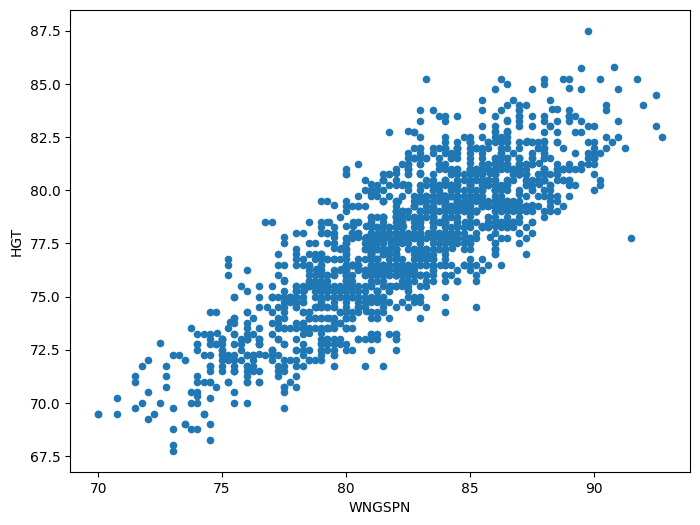

In [ ]:
# remove the rows with the identified outliers with three largest values in the column we get the index
# Identify the indices of the 3 rows with the largest values in a column (e.g., 'WNGSPN')
# Change 'WNGSPN' to the appropriate column name if needed
players_todrop = df["WNGSPN"].nlargest(3).index

# Create a new DataFrame with those rows dropped
df_dropped = df.drop(players_todrop)

# Check the new DataFrame by plotting a scatter plot of 'WNGSPN' vs 'HGT' (or another appropriate pair of columns)
df_dropped.plot.scatter(x='WNGSPN', y='HGT', figsize=(8, 6))

# Show the plot
import matplotlib.pyplot as plt
plt.show()


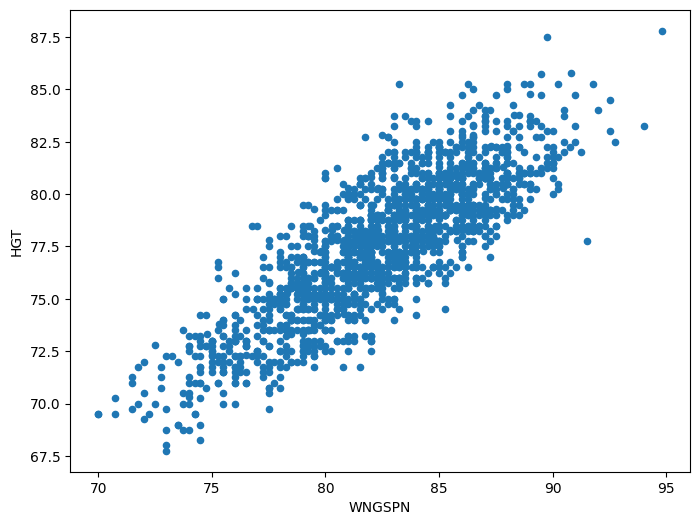

In [ ]:
# do the same for the outlier in height
# Identify the index of the row with the largest value in the "Height (cm)" column
players_todrop = df["HGT"].nlargest(1).index

# Create a new DataFrame with the outlier row dropped
df_cleaned = df.drop(players_todrop)

# Check the new DataFrame by plotting a scatter plot of 'Width (cm)' vs 'Height (cm)'
df_cleaned.plot.scatter(x='WNGSPN', y='HGT', figsize=(8, 6))

# Show the plot
import matplotlib.pyplot as plt
plt.show()


> When do you stop to remove outliers?
after removing these values your plot would zoom in, but be careful not to over do this. Scatter plots are less reliable ways to remove outliers but sometimes can be intuitive.

### 1.5.3. Saving a plot

`matplotlib` provides functionality for saving a figure as an image using the method `savefig()`. We need to get the figure from our plot by calling `get_figure` on the matplotlib `Axes` object and then calling the method `savefig()`.

In [ ]:
# Save the plot as a PNG file (standard resolution)
plt.savefig('height_wingspan_scatter.png')

# Save a high-resolution version of the plot (DPI set to 300)
plt.savefig('height_wingspan_scatter_high_res.png', dpi=300)

# Save a vectorized version of the plot (SVG format)
plt.savefig('height_wingspan_scatter.svg', format='svg')

<Figure size 640x480 with 0 Axes>

### Other plotting libraries

There are many other Python visualization libraries beyond `matplotlib`. Depending on your visualization needs, there are libraries that offer additional features such as advanced plot types, enhanced styling options, the ability to plot large datasets, and interactivity. We will introduce two popular plotting libraries, **Seaborn** and **Altair**, that provide additional functionality while also working well with pandas data structures.

You can find an exhaustive overview of Python visualization tools on the [PyViz website](https://pyviz.org/index.html).

#### Seaborn

Seaborn is a "Matplotlib-based high-level interface for drawing statistical graphics." Seaborn builds upon the functionality of matplotlib and provides more robust options. You can learn more and find documentation on the [seaborn website](https://seaborn.pydata.org/)

In [ ]:
# Import the Seaborn library as sns (callable in our code as sns)
import seaborn as sns

We will use the seaborn `scatterplot()` method to generate the same scatter plot we created earlier of the width and height of smaller paintings, but this time will use seaborn's easy functionality fo encoding data into the color of the scatter plot points.

With most seaborn plotting methods we pass in keyword arguments to specify the data source (`data=small_paintings`) and the specific encodings of the data in the plot, in our case the horizontal axis variable (`x='Width (cm)'`), the vertical axis variable (`y='Height (cm)'`), and the variable represented by color (`hue='AspectString'`).

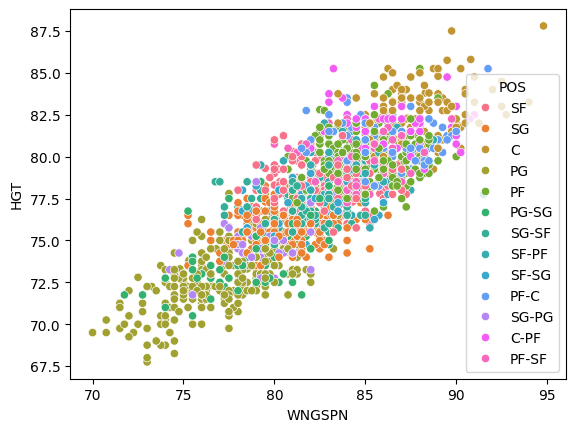

In [ ]:
# Create a seaborn scatter plot, plotting "Width (cm)" on the
# horizontal axis and "Height (cm)" on the vertical axis and using
# "AspectString" to define the color of each point
import matplotlib.pyplot as plt

# Create the scatter plot with available columns
sns.scatterplot(x='WNGSPN', y='HGT', hue='POS', data=df_cleaned)

# Display the plot
plt.show()

## 1.6. Data Wrangling

> Wrangling is often used to change into a format that is usable, includes merging, subsetting and transformation.



### 1.6.1. Replacing values in a column

We can replace values in a column by first accessing that column and using the Series method `replace()` (*remember accessing one column from a DataFrame returns a pandas Series*). The `replace()` method can accept a dictionary of items in which the dictionary keys are the values to be replaced and the dictionary values are the new values to be inserted.

We will demonstrate this method by replacing the values `Y` and `N` in the `Cataloged` column to the more explicit values `Yes` and `No`, respectively. Also, we will edit the DataFrame directly by including the keyword argument `inplace=True`.

In [ ]:
# print the columns and the number of values and datatypes for reference
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      1610 non-null   object 
 1   PLAYER    1610 non-null   object 
 2   POS       1609 non-null   object 
 3   HGT       1608 non-null   float64
 4   WGT       1606 non-null   object 
 5   BMI       1606 non-null   float64
 6   BF        1235 non-null   float64
 7   WNGSPN    1609 non-null   float64
 8   STNDRCH   1607 non-null   float64
 9   HANDL     880 non-null    float64
 10  HANDW     880 non-null    float64
 11  STNDVERT  1427 non-null   float64
 12  LPVERT    1427 non-null   float64
 13  LANE      1418 non-null   float64
 14  SHUTTLE   553 non-null    float64
 15  SPRINT    1419 non-null   float64
dtypes: float64(12), object(4)
memory usage: 201.4+ KB


,YEAR,PLAYER,POS,HGT,WGT,BMI,BF,WNGSPN,STNDRCH,HANDL,HANDW,STNDVERT,LPVERT,LANE,SHUTTLE,SPRINT
0,2024,"Ajayi, Michael",SF,77.8,227.8,26.49,NaN,84.8,106.5,9.5,9.8,27.0,34.5,12.0,3.17,3.21
1,2024,"Ajinca, Melvin",SF,79.3,213.8,23.93,NaN,79.5,106.5,8.5,9.8,26.5,31.0,12.0,3.00,3.38
2,2024,"Alexander, Trey",SG,75.3,187,23.22,NaN,82.5,101.5,9.0,10.0,27.0,32.0,11.0,3.00,3.00
3,2024,"Almansa, Izan",C,81.3,219.6,23.39,NaN,85.0,110.0,9.0,9.0,28.0,35.0,11.0,3.00,3.00
4,2024,"Beekman, Reece",PG,73.3,196.4,25.73,NaN,78.5,100.0,9.0,9.0,30.0,37.0,11.0,3.00,3.00


In [ ]:
df.head()

# Replacing names in the format: Last, First with First Last
df['PLAYER'] = df['PLAYER'].str.split(', ').str[::-1].str.join(' ')


In [ ]:
from google.colab import drive
from google.colab import files

df.to_csv('draft_combine_data.csv')

files.download('draft_combine_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 1.7. Data Merging

### 1.7.1. Load the multiple datasets

We have prepared the data from the MoMA dataset for this workshop. We will import those datasets into our notebook to use them for data analysis.

Datasets can be stored in several types of files, including .csv, .json, .txt, .xls, .xlsx, and more. Here we will import a .csv file and a .json file.

Preview the CSV file
Preview the EXCEL file
Preview the JSON file

Use this link for File 1: https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_paintings.csv

For File 2: https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_photographs.xlsx

For file 3: https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_sculptures.json


In [ ]:
# load file 3 sculptures
sculptures = pd.read_json('https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_sculptures.json')
sculptures.head()

<ipython-input-37-5d64f99e7a0d>:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  sculptures = pd.read_json('https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_sculptures.json')
<ipython-input-37-5d64f99e7a0d>:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  sculptures = pd.read_json('https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_sculptures.json')
<ipython-input-37-5d64f99e7a0d>:2: FutureW

,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
73418,Surface with Vibrating Texture,Getulio Alviani,137.0,1964,Brushed aluminum on board,"33 x 32 3/4"" (83.6 x 83.2 cm)",Larry Aldrich Foundation Fund,105.1965,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjIwODIwOCJd...,NaN,NaN,NaN,83.6,NaN,NaN,83.2,NaN,NaN
73474,IN RELATION TO AN INCREASE IN QUANTITY REGARDL...,Lawrence Weiner,6288.0,1973-74,LANGUAGE + THE MATERIALS REFERRED TO,Dimensions variable,Given anonymously,117.1975,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjMxODk1MSJd...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73564,3 Standard Stoppages,Marcel Duchamp,1634.0,Paris 1913-14,"Wood box 11 1/8 x 50 7/8 x 9"" (28.2 x 129.2 x ...",None,Katherine S. Dreier Bequest,149.1953.a-i,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjEzODY0NSJd...,NaN,NaN,NaN,13.3,NaN,NaN,120.0,NaN,NaN
73567,To Be Looked at (from the Other Side of the Gl...,Marcel Duchamp,1634.0,Buenos Aires 1918,"Oil, silver leaf, lead wire, and magnifying le...","Overall 22"" (55.8 cm) high",Katherine S. Dreier Bequest,150.1953,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjI0MzI3MyJd...,NaN,NaN,NaN,49.5,NaN,NaN,39.7,NaN,NaN
73733,Revolving,Kurt Schwitters,5293.0,1919,"Wood, metal, cord, cardboard, wool, wire, leat...","48 3/8 x 35"" (122.7 x 88.7 cm)",Advisory Committee Fund,231.1968,Sculpture,Painting & Sculpture,...,http://www.moma.org/media/W1siZiIsIjEyMjc3MCJd...,NaN,NaN,NaN,122.7,NaN,NaN,88.7,NaN,NaN


# Credits

This workshop was created by Aditi Mallavarapu, Claire Cahoon and Walt Gurley, adapted from previous workshop materials by Scott Bailey and Simon Wiles, of Stanford Libraries.